In [1]:
#import combined table to python

import pandas as pd
model = pd.read_csv("D:\Internship\Dataset\FinalModeliteration\FinalModel.csv")
model

,UID,type,loan_amount,age,purpose_of_loan,requested_amount,marital_status,residenceType,income,monthly_rent,ownership,number_prev_loans,prev_def,prev_bal,loan_default
0,1JIJ98G,PERSONAL LOAN,1000000,45.137135,wedding,500000.0,MARRIED,Own House,150000.0,0,INDIVIDUAL,9,0,0,0
1,1ITH0P5,PERSONAL LOAN,381412,31.850072,other,500000.0,MARRIED,Rented - Family,60000.0,5000,INDIVIDUAL,16,1,72720,0
2,1ITDL9J,PERSONAL LOAN,84770,37.898109,wedding,500000.0,MARRIED,Rented - Family,100000.0,8000,INDIVIDUAL,5,0,387762,0
3,1I6G9PG,PERSONAL LOAN,712844,30.097812,loanrefinancing,60000.0,SINGLE,Own House,60000.0,0,INDIVIDUAL,14,0,1059828,0
4,1I5K2R3,PERSONAL LOAN,195206,33.104034,Personal,50000.0,MARRIED,Own House,31700.0,0,INDIVIDUAL,4,0,42361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12808,1AG01U9,PERSONAL LOAN,25000,33.046538,loanrefinancing,200000.0,MARRIED,Rented - Family,25000.0,6000,INDIVIDUAL,5,0,100143,0
12809,1AFL31H,CREDIT CARD,2499,23.833481,other,500000.0,SINGLE,Rented - Alone,21000.0,1500,INDIVIDUAL,1,0,0,0
12810,1AFL1VT,CREDIT CARD,45318,24.786272,wedding,260000.0,SINGLE,Rented - Alone,31000.0,6000,INDIVIDUAL,1,0,25432,0
12811,1AFKVOI,PERSONAL LOAN,285448,31.598185,homeimprovement,500000.0,MARRIED,Rented - Family,60000.0,6000,INDIVIDUAL,3,0,167230,0


In [2]:
import numpy as np
per_reqamt = np.percentile(model['requested_amount'],95)
per_lowreqamt = np.percentile(model['requested_amount'],5)
per_reqamt

500000.0

In [3]:
per_income = np.percentile(model['income'],95)
per_lowincome = np.percentile(model['income'],5)
per_income

82000.0

In [4]:
per_numprev = np.percentile(model['number_prev_loans'],95)
per_lownumprev = np.percentile(model['number_prev_loans'],5)
per_numprev

19.0

In [5]:
per_prevbal = np.percentile(model['prev_bal'],95)
per_lowprevbal = np.percentile(model['prev_bal'],5)
per_prevbal

1692743.5999999996

In [6]:
model['income'] = model.apply(lambda x: np.where(model['income']>per_income,per_income,model['income']))
model['requested_amount'] = model.apply(lambda x: np.where(model['requested_amount']>per_reqamt,per_reqamt,model['requested_amount']))
model['number_prev_loans'] = model.apply(lambda x: np.where(model['number_prev_loans']>per_numprev,per_numprev,model['number_prev_loans']))
model['prev_bal'] = model.apply(lambda x: np.where(model['prev_bal']>per_prevbal,per_prevbal,model['prev_bal']))
model['income'] = model.apply(lambda x: np.where(model['income']<per_lowincome,per_lowincome,model['income']))
model['requested_amount'] = model.apply(lambda x: np.where(model['requested_amount']<per_lowreqamt,per_lowreqamt,model['requested_amount']))
model['number_prev_loans'] = model.apply(lambda x: np.where(model['number_prev_loans']<per_lownumprev,per_lownumprev,model['number_prev_loans']))
model['prev_bal'] = model.apply(lambda x: np.where(model['prev_bal']<per_lowprevbal,per_lowprevbal,model['prev_bal']))
model['loan_amount'] = model.apply(lambda x: np.where(model['loan_amount']<0,0,model['income']))

In [7]:
import matplotlib.pyplot as plt
df_defaulted = model.loc[model['loan_default']==1]
df_defaulted
df_notdefaulted = model.loc[model['loan_default']==0]
df_notdefaulted


,UID,type,loan_amount,age,purpose_of_loan,requested_amount,marital_status,residenceType,income,monthly_rent,ownership,number_prev_loans,prev_def,prev_bal,loan_default
0,1JIJ98G,PERSONAL LOAN,82000.0,45.137135,wedding,500000.0,MARRIED,Own House,82000.0,0,INDIVIDUAL,9.0,0,0.0,0
1,1ITH0P5,PERSONAL LOAN,60000.0,31.850072,other,500000.0,MARRIED,Rented - Family,60000.0,5000,INDIVIDUAL,16.0,1,72720.0,0
2,1ITDL9J,PERSONAL LOAN,82000.0,37.898109,wedding,500000.0,MARRIED,Rented - Family,82000.0,8000,INDIVIDUAL,5.0,0,387762.0,0
3,1I6G9PG,PERSONAL LOAN,60000.0,30.097812,loanrefinancing,60000.0,SINGLE,Own House,60000.0,0,INDIVIDUAL,14.0,0,1059828.0,0
4,1I5K2R3,PERSONAL LOAN,31700.0,33.104034,Personal,50000.0,MARRIED,Own House,31700.0,0,INDIVIDUAL,4.0,0,42361.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12808,1AG01U9,PERSONAL LOAN,25000.0,33.046538,loanrefinancing,200000.0,MARRIED,Rented - Family,25000.0,6000,INDIVIDUAL,5.0,0,100143.0,0
12809,1AFL31H,CREDIT CARD,21000.0,23.833481,other,500000.0,SINGLE,Rented - Alone,21000.0,1500,INDIVIDUAL,1.0,0,0.0,0
12810,1AFL1VT,CREDIT CARD,31000.0,24.786272,wedding,260000.0,SINGLE,Rented - Alone,31000.0,6000,INDIVIDUAL,1.0,0,25432.0,0
12811,1AFKVOI,PERSONAL LOAN,60000.0,31.598185,homeimprovement,500000.0,MARRIED,Rented - Family,60000.0,6000,INDIVIDUAL,3.0,0,167230.0,0


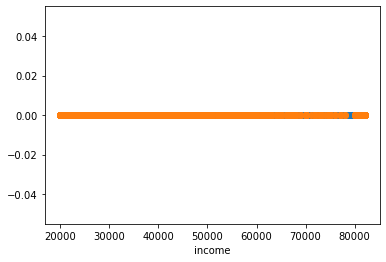

In [8]:
plt.plot(df_notdefaulted['income'],np.zeros_like(df_notdefaulted['income']),'o')
plt.plot(df_defaulted['income'],np.zeros_like(df_defaulted['income']),'o')
plt.xlabel('income')
plt.show()

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

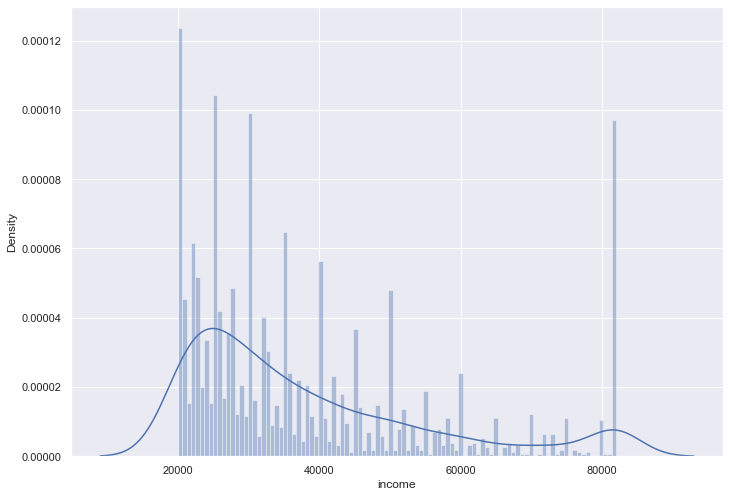

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_defaulted['income'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

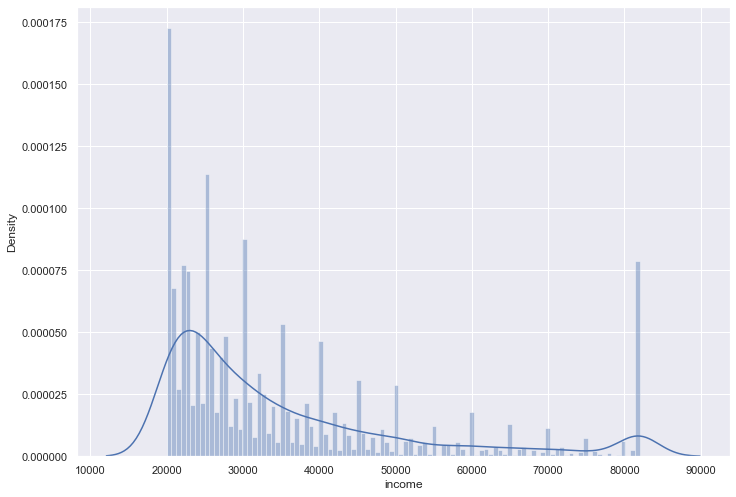

In [10]:
sns.distplot(df_notdefaulted['income'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


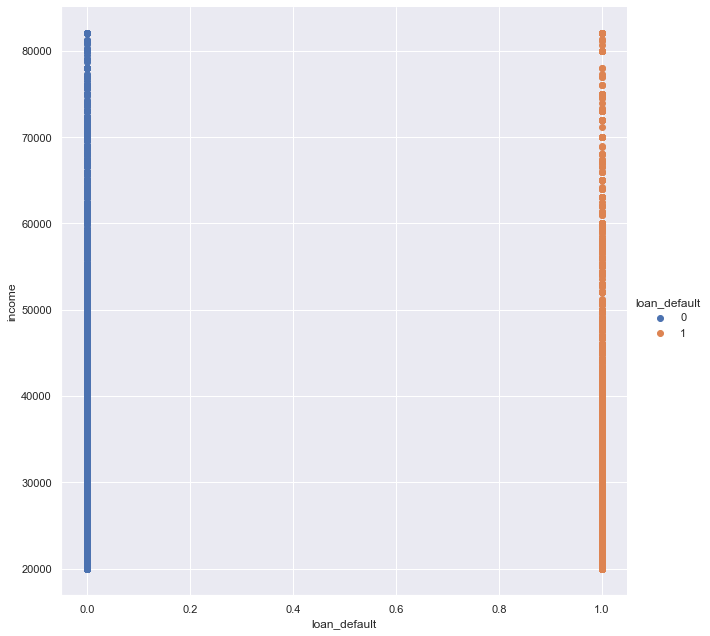

In [11]:
sns.FacetGrid(model,hue='loan_default',size=9).map(plt.scatter,"loan_default","income").add_legend();
plt.show()

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

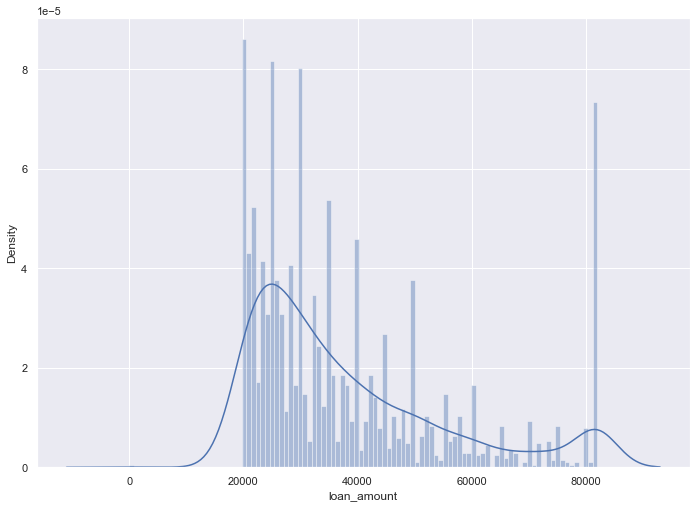

In [12]:
sns.distplot(df_defaulted['loan_amount'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

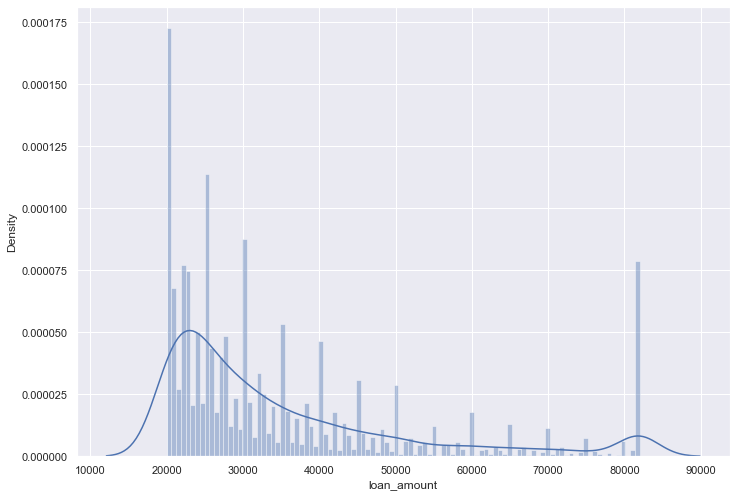

In [13]:
sns.distplot(df_notdefaulted['loan_amount'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='requested_amount', ylabel='Density'>

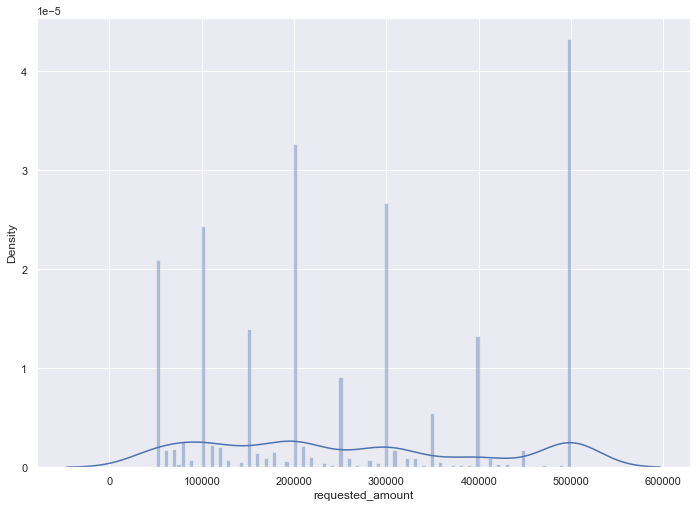

In [14]:
sns.distplot(df_defaulted['requested_amount'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='requested_amount', ylabel='Density'>

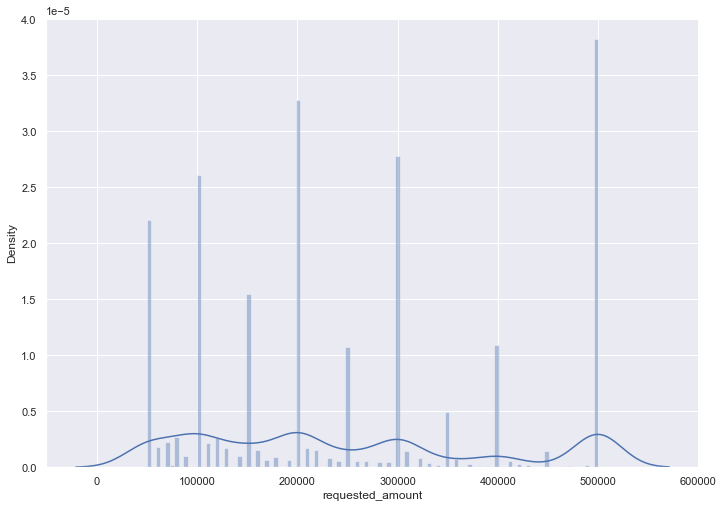

In [15]:
sns.distplot(df_notdefaulted['requested_amount'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_prev_loans', ylabel='Density'>

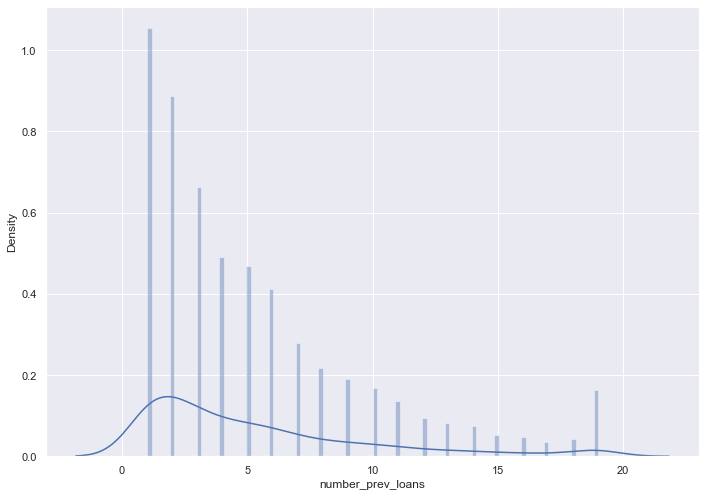

In [16]:
sns.distplot(df_defaulted['number_prev_loans'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_prev_loans', ylabel='Density'>

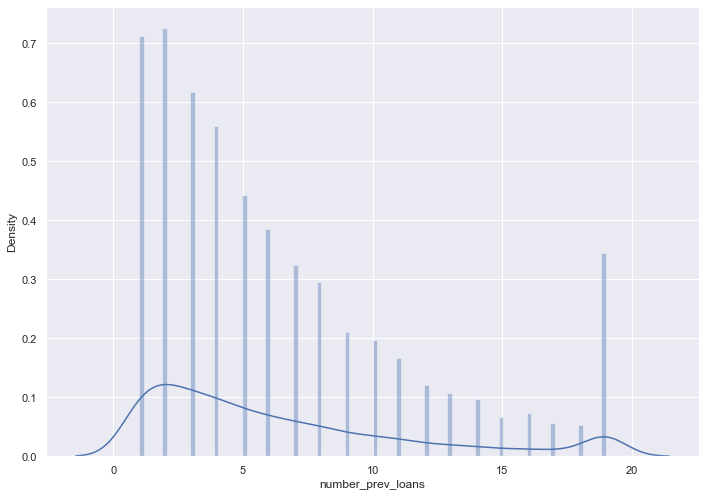

In [17]:
sns.distplot(df_notdefaulted['number_prev_loans'],bins=100)

In [18]:
agedef = df_defaulted['age']
agedef.to_csv(r'D:\Internship\Dataset\Tables for EDA\agedef.csv')
agenotdef = df_notdefaulted['age']
agenotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\agenotdef.csv')
type_def = df_defaulted['type'].value_counts().to_frame()
type_def = type_def.reset_index()
type_def.columns = ['Type','Number']
type_def.to_csv(r'D:\Internship\Dataset\Tables for EDA\typedef.csv')
type_notdef = df_notdefaulted['type'].value_counts().to_frame()
type_notdef = type_notdef.reset_index()
type_notdef.columns = ['Type','Number']
type_notdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\typenotdef.csv')
loanamountnotdef = df_notdefaulted['loan_amount']
loanamountnotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\loanamountnotdef.csv')
loanamountdef = df_defaulted['loan_amount']
loanamountdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\loanamountdef.csv')
purpose_def = df_defaulted['purpose_of_loan'].value_counts().to_frame()
purpose_def = purpose_def.reset_index()
purpose_def.columns = ['Purpose','Number']
purpose_def.to_csv(r'D:\Internship\Dataset\Tables for EDA\purpose_def.csv')
purpose_notdef = df_notdefaulted['purpose_of_loan'].value_counts().to_frame()
purpose_notdef = purpose_notdef.reset_index()
purpose_notdef.columns = ['Purpose','Number']
purpose_notdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\purpose_notdef.csv')
marital_def = df_defaulted['marital_status'].value_counts().to_frame()
marital_def = marital_def.reset_index()
marital_def.columns = ['Status','Number']
marital_def.to_csv(r'D:\Internship\Dataset\Tables for EDA\maritaldef.csv')
marital_notdef = df_notdefaulted['marital_status'].value_counts().to_frame()
marital_notdef = marital_notdef.reset_index()
marital_notdef.columns = ['Status','Number']
marital_notdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\maritalnotdef.csv')
residence_notdef = df_notdefaulted['residenceType'].value_counts().to_frame()
residence_notdef = residence_notdef.reset_index()
residence_notdef.columns = ['Residence','Number']
residence_notdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\residencenotdef.csv')
residence_def = df_defaulted['residenceType'].value_counts().to_frame()
residence_def = residence_def.reset_index()
residence_def.columns = ['Residence','Number']
residence_def.to_csv(r'D:\Internship\Dataset\Tables for EDA\residencedef.csv')
own_notdef = df_notdefaulted['ownership'].value_counts().to_frame()
own_notdef = own_notdef.reset_index()
own_notdef.columns = ['Ownership','Number']
own_notdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\ownnotdef.csv')
own_def = df_defaulted['ownership'].value_counts().to_frame()
own_def = own_def.reset_index()
own_def.columns = ['Ownership','Number']
own_def.to_csv(r'D:\Internship\Dataset\Tables for EDA\own_def.csv')
incomenotdef = df_notdefaulted['income']
incomenotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\incomenotdef.csv')
incomedef = df_defaulted['income']
incomedef.to_csv(r'D:\Internship\Dataset\Tables for EDA\incomedef.csv')
numberloansdef = df_defaulted['number_prev_loans']
numberloansdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\numberloansdef.csv')
numberloansnotdef = df_notdefaulted['number_prev_loans']
numberloansnotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\numberloansnotdef.csv')
prevdef = df_defaulted['prev_def']
prevdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevdef.csv')
prevnotdef = df_notdefaulted['prev_def']
prevnotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevnotdef.csv')
prevdef1  =  prevdef==1
prevdef1 = prevdef[prevdef1]
prevdef1.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevdef1.csv')
prevdef0  =  prevdef==0
prevdef0 = prevdef[prevdef0]
prevdef0.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevdef0.csv')
prevnotdef1  =  prevnotdef==1
prevnotdef1 = prevnotdef[prevnotdef1]
prevnotdef1.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevnotdef1.csv')
prevnotdef0  =  prevnotdef==0
prevnotdef0 = prevnotdef[prevnotdef0]
prevnotdef0.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevnotdef0.csv')

In [19]:
np.corrcoef(model['age'],model['loan_default'])

array([[ 1.        , -0.06082863],
       [-0.06082863,  1.        ]])

In [20]:
model.corr()

,loan_amount,age,requested_amount,income,monthly_rent,number_prev_loans,prev_def,prev_bal,loan_default
loan_amount,1.000000,0.198070,0.240127,0.999915,0.025324,0.323045,0.236404,0.379044,0.069990
age,0.198070,1.000000,0.123345,0.198124,0.004269,0.406739,0.174100,0.224051,-0.060829
requested_amount,0.240127,0.123345,1.000000,0.240202,-0.008743,0.118154,0.059518,0.106363,0.033114
income,0.999915,0.198124,0.240202,1.000000,0.025326,0.322999,0.236589,0.379032,0.070236
monthly_rent,0.025324,0.004269,-0.008743,0.025326,1.000000,0.001371,0.011538,-0.002635,-0.004322
number_prev_loans,0.323045,0.406739,0.118154,0.322999,0.001371,1.000000,0.185209,0.490363,-0.092164
prev_def,0.236404,0.174100,0.059518,0.236589,0.011538,0.185209,1.000000,0.011348,0.281290
prev_bal,0.379044,0.224051,0.106363,0.379032,-0.002635,0.490363,0.011348,1.000000,-0.105573
loan_default,0.069990,-0.060829,0.033114,0.070236,-0.004322,-0.092164,0.281290,-0.105573,1.000000


In [21]:
model.to_csv(r'D:\Internship\Dataset\FinalModeliteration\FinalModelUpdated.csv')

In [22]:
df_defaulted['income'].describe()

count     2493.000000
mean     38095.600882
std      17483.298668
min      20000.000000
25%      25000.000000
50%      32000.000000
75%      46000.000000
max      82000.000000
Name: income, dtype: float64

In [23]:
df_notdefaulted['income'].describe()

count    10320.000000
mean     35094.347868
std      16725.195353
min      20000.000000
25%      23000.000000
50%      29000.000000
75%      40000.000000
max      82000.000000
Name: income, dtype: float64

In [24]:
df_defaulted['number_prev_loans'].describe()

count    2493.000000
mean        5.289611
std         4.530036
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        19.000000
Name: number_prev_loans, dtype: float64

In [25]:
df_notdefaulted['number_prev_loans'].describe()

count    10320.000000
mean         6.470252
std          5.167669
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         19.000000
Name: number_prev_loans, dtype: float64

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prev_bal', ylabel='Density'>

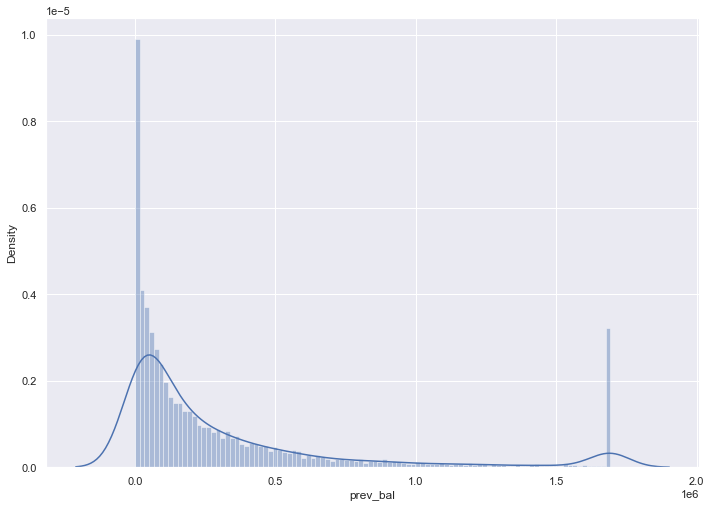

In [26]:
sns.distplot(df_notdefaulted['prev_bal'],bins=100)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prev_bal', ylabel='Density'>

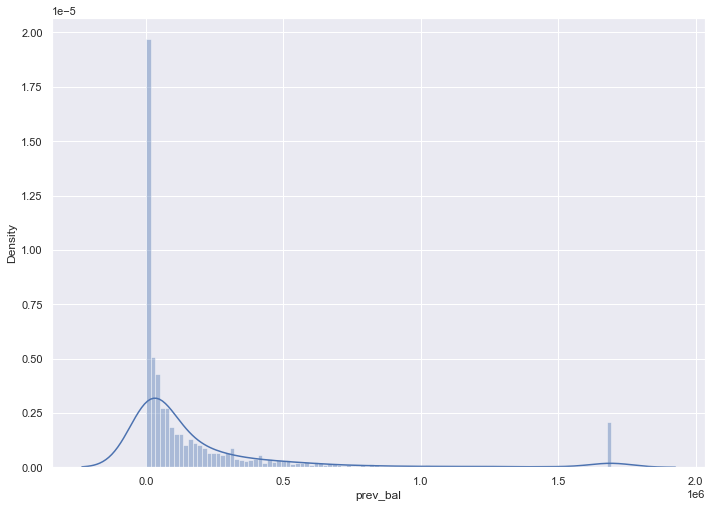

In [27]:
sns.distplot(df_defaulted['prev_bal'],bins=100)

In [28]:
df_defaulted['age'].describe()

count    2493.000000
mean       29.661762
std         5.802872
min        17.298096
25%        25.498128
50%        28.419475
75%        32.403129
max        63.141611
Name: age, dtype: float64

In [29]:
df_notdefaulted['age'].describe()

count    10320.000000
mean        30.561819
std          5.857741
min         18.902510
25%         26.292121
50%         29.294236
75%         33.402465
max         58.043629
Name: age, dtype: float64

In [30]:
df_defaulted['loan_amount'].describe()

count     2493.000000
mean     38085.572804
std      17497.976657
min          0.000000
25%      25000.000000
50%      32000.000000
75%      46000.000000
max      82000.000000
Name: loan_amount, dtype: float64

In [31]:
df_notdefaulted['loan_amount'].describe()

count    10320.000000
mean     35094.347868
std      16725.195353
min      20000.000000
25%      23000.000000
50%      29000.000000
75%      40000.000000
max      82000.000000
Name: loan_amount, dtype: float64

In [32]:
df_notdefaulted['income'].describe()

count    10320.000000
mean     35094.347868
std      16725.195353
min      20000.000000
25%      23000.000000
50%      29000.000000
75%      40000.000000
max      82000.000000
Name: income, dtype: float64

In [36]:
prevbaldef = df_defaulted['prev_bal']
prevbaldef

10         61152.0
11          3477.0
15          1480.0
21         37329.0
23             0.0
           ...    
12773          0.0
12787      72217.0
12790    1692743.6
12794          0.0
12806          0.0
Name: prev_bal, Length: 2493, dtype: float64

In [37]:
prevbaldef.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevbaldef.csv')

In [39]:
prevbalnotdef = df_notdefaulted['prev_bal']
prevbalnotdef

0              0.0
1          72720.0
2         387762.0
3        1059828.0
4          42361.0
           ...    
12808     100143.0
12809          0.0
12810      25432.0
12811     167230.0
12812      18915.0
Name: prev_bal, Length: 10320, dtype: float64

In [40]:
prevbalnotdef.to_csv(r'D:\Internship\Dataset\Tables for EDA\prevbalnotdef.csv')

In [41]:
prevbaldef.describe()

count    2.493000e+03
mean     2.030979e+05
std      3.714739e+05
min      0.000000e+00
25%      2.620000e+02
50%      5.295600e+04
75%      2.105700e+05
max      1.692744e+06
Name: prev_bal, dtype: float64

In [42]:
prevbalnotdef.describe()

count    1.032000e+04
mean     3.186902e+05
std      4.442421e+05
min      0.000000e+00
25%      3.752225e+04
50%      1.351940e+05
75%      3.882735e+05
max      1.692744e+06
Name: prev_bal, dtype: float64